In [56]:
!pip install ipython-autotime
%load_ext autotime

from matplotlib import pyplot as plt
import cProfile
import re
from time import perf_counter

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 11.6 s (started: 2023-11-27 17:15:51 +00:00)


In [51]:
tests = [
    {
        "matrix": [
            [1, 2, -1, -4, -20],
            [-8, -3, 4, 2, 1],
            [3, 8, 10, 1, 3],
            [-4, -1, 1, 7, -6],
        ],
        "expected_result": 29,
        "subarray_indices": [(1, 1), (3, 3)], #top left and bottom right indices
    },

    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
        "expected_result": 45,
        "subarray_indices": [(0, 0), (2, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3], [4, -5, 6], [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [
            [2, -1, 4, -6, 2],
            [-3, 2, -1, 4, -3],
            [1, -5, 2, -1, 5],
            [4, -2, 3, 7, -2],
        ],
        "expected_result": 14,
        "subarray_indices": [(0, 2), (3, 4)],
    },
    {
        "matrix": [[-2, 5, -1, 4], [8, -6, 3, 1], [2, 2, -4, -1], [-3, 2, 6, -1]],
        "expected_result": 15,
        "subarray_indices": [(0, 0), (3, 3)],
    },
    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
        "expected_result": 78,
        "subarray_indices": [(0, 0), (3, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9], [-10, -11, -12]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3], [4, -5, 6], [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
        "expected_result": 78,
        "subarray_indices": [(0, 0), (3, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9], [-10, -11, -12]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3],
                   [4, -5, 6],
                   [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [
            [2, -1, 4, -6, 2],
            [-3, 2, -1, 4, -3],
            [1, -5, 2, -1, 5],
            [4, -2, 3, 7, -2],
        ],
        "expected_result": 14,
        "subarray_indices": [(0, 2), (3, 4)],
    },
    {
        "matrix": [
            [-2, 5, -1, 4],
            [8, -6, 3, 1],
            [2, 2, -4, -1],
            [-3, 2, 6, -1]],
        "expected_result": 15,
        "subarray_indices": [(0, 0), (3, 3)],
    },
    {
        "matrix": [[1, 1],
                   [1, 1], [1, 1], [1, 1]],
        "expected_result": 8,
        "subarray_indices": [(0, 0), (3, 1)],
    },
]


time: 2.2 ms (started: 2023-11-27 16:25:58 +00:00)


In [53]:
def print_subset(matrix, start_row, end_row, start_col, end_col):
  print("Printing the subset of the matrix :")
  for i in range(start_row, end_row+1):
      for j in range(start_col, end_col+1):
          print(matrix[i][j], end=" ")
      print()

time: 733 µs (started: 2023-11-27 16:26:24 +00:00)


In [54]:
def maxMatrixSum(matrix, K, L):
    rows = len(matrix)
    cols = len(matrix[0])

    # Calculate cumulative sums
    cumulative_sums = [[0] * (cols + 1) for _ in range(rows + 1)]
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            cumulative_sums[i][j] = (
                matrix[i - 1][j - 1]
                + cumulative_sums[i - 1][j]
                + cumulative_sums[i][j - 1]
                - cumulative_sums[i - 1][j - 1]
            )

    max_sum = float('-inf')
    top, left, bottom, right = 0, 0, 0, 0

    # Calculate submatrix sums using cumulative sums
    for i in range(K, rows + 1):
        for j in range(L, cols + 1):
            submatrix_sum = (
                cumulative_sums[i][j]
                - cumulative_sums[i - K][j]
                - cumulative_sums[i][j - L]
                + cumulative_sums[i - K][j - L]
            )

            if submatrix_sum > max_sum:
                max_sum = submatrix_sum
                top = i - K
                bottom = i - 1
                left = j - L
                right = j - 1
    print_subset(matrix,top,bottom,left, right)
    print("Maximum Subarray Sum:", max_sum)
    print("Indices of Maximum Subarray:")
    print(f"Top: {top}, Left: {left}, Bottom: {bottom}, Right: {right}\n")

K = 2
L = 2

for i in range(len(tests)):
  matrix = tests[i]
  maxMatrixSum(matrix["matrix"],K,L)


Printing the subset of the matrix
-3 4 
8 10 
Maximum Subarray Sum: 19
Indices of Maximum Subarray:
Top: 1, Left: 1, Bottom: 2, Right: 2

Printing the subset of the matrix
5 6 
8 9 
Maximum Subarray Sum: 28
Indices of Maximum Subarray:
Top: 1, Left: 1, Bottom: 2, Right: 2

Printing the subset of the matrix
-1 -2 
-4 -5 
Maximum Subarray Sum: -12
Indices of Maximum Subarray:
Top: 0, Left: 0, Bottom: 1, Right: 1

Printing the subset of the matrix
-2 3 
-5 6 
Maximum Subarray Sum: 2
Indices of Maximum Subarray:
Top: 0, Left: 1, Bottom: 1, Right: 2

Printing the subset of the matrix
1 2 
3 4 
Maximum Subarray Sum: 10
Indices of Maximum Subarray:
Top: 0, Left: 0, Bottom: 1, Right: 1

Printing the subset of the matrix
2 -1 
3 7 
Maximum Subarray Sum: 11
Indices of Maximum Subarray:
Top: 2, Left: 2, Bottom: 3, Right: 3

Printing the subset of the matrix
-1 4 
3 1 
Maximum Subarray Sum: 7
Indices of Maximum Subarray:
Top: 0, Left: 2, Bottom: 1, Right: 3

Printing the subset of the matrix
8 9 


In [58]:
count = []
# function to benchmark
def task():

    for i in range(len(tests)):
      matrix = tests[i]
      maxMatrixSum(matrix["matrix"],K,L)

if __name__ == '__main__':
    # run 3 times and record the durations
    times = list()
    for i in range(10):
        count.append(i+1)
        # record start time
        time_start = perf_counter()
        # run the task
        task()
        # calculate the duration
        time_duration = perf_counter() - time_start
        # report the duration
        print(f'>took {time_duration:.3f} seconds')
        # store the duration
        times.append(time_duration)
    # report the average duration
    time_average = sum(times) / 10.0
    print(f'Average time {time_average:.3f} seconds')

Printing the subset of the matrix
-3 4 
8 10 
Maximum Subarray Sum: 19
Indices of Maximum Subarray:
Top: 1, Left: 1, Bottom: 2, Right: 2

Printing the subset of the matrix
5 6 
8 9 
Maximum Subarray Sum: 28
Indices of Maximum Subarray:
Top: 1, Left: 1, Bottom: 2, Right: 2

Printing the subset of the matrix
-1 -2 
-4 -5 
Maximum Subarray Sum: -12
Indices of Maximum Subarray:
Top: 0, Left: 0, Bottom: 1, Right: 1

Printing the subset of the matrix
-2 3 
-5 6 
Maximum Subarray Sum: 2
Indices of Maximum Subarray:
Top: 0, Left: 1, Bottom: 1, Right: 2

Printing the subset of the matrix
1 2 
3 4 
Maximum Subarray Sum: 10
Indices of Maximum Subarray:
Top: 0, Left: 0, Bottom: 1, Right: 1

Printing the subset of the matrix
2 -1 
3 7 
Maximum Subarray Sum: 11
Indices of Maximum Subarray:
Top: 2, Left: 2, Bottom: 3, Right: 3

Printing the subset of the matrix
-1 4 
3 1 
Maximum Subarray Sum: 7
Indices of Maximum Subarray:
Top: 0, Left: 2, Bottom: 1, Right: 3

Printing the subset of the matrix
8 9 


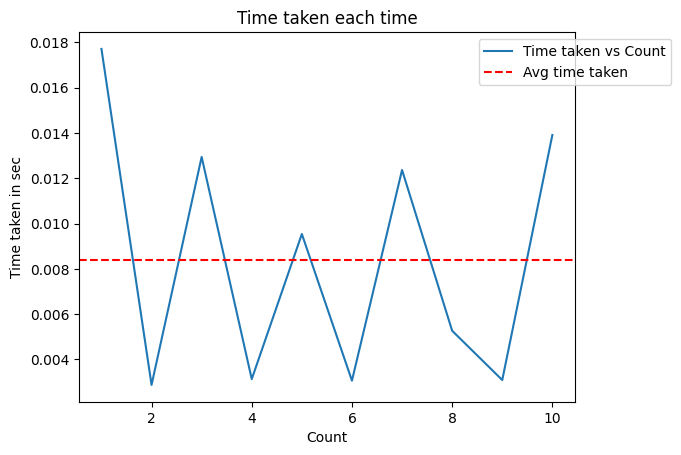

time: 421 ms (started: 2023-11-27 17:16:19 +00:00)


In [59]:
plt.plot(count,times,label="Time taken vs Count")
plt.axhline(y = time_average, color = 'r', linestyle = '--',label="Avg time taken")
plt.xlabel("Count")
plt.ylabel("Time taken in sec")
plt.title('Time taken each time')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()